### Step 1: Import Necessary Libraries
We import the required libraries:
1. `RandomForestClassifier` from `sklearn.ensemble` for building the Random Forest model.
2. Metrics from `sklearn.metrics` to evaluate the model's performance.


In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


### Step 2: Load the Preprocessed Data
Load the preprocessed features and target datasets saved earlier. Ensure that the feature set (`X`) and the target (`y`) are correctly aligned.


In [2]:
# Load preprocessed data
import pandas as pd

X_file_path = 'preprocessed_features.csv'
y_file_path = 'preprocessed_target.csv'

X = pd.read_csv(X_file_path)
y = pd.read_csv(y_file_path).squeeze()  # Squeeze ensures y is a Series instead of DataFrame


### Step 3: Split the Data into Training and Testing Sets
Split the data into training and testing sets:
- 80% for training and 20% for testing.
- Stratify the split to ensure balanced class distribution.


In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


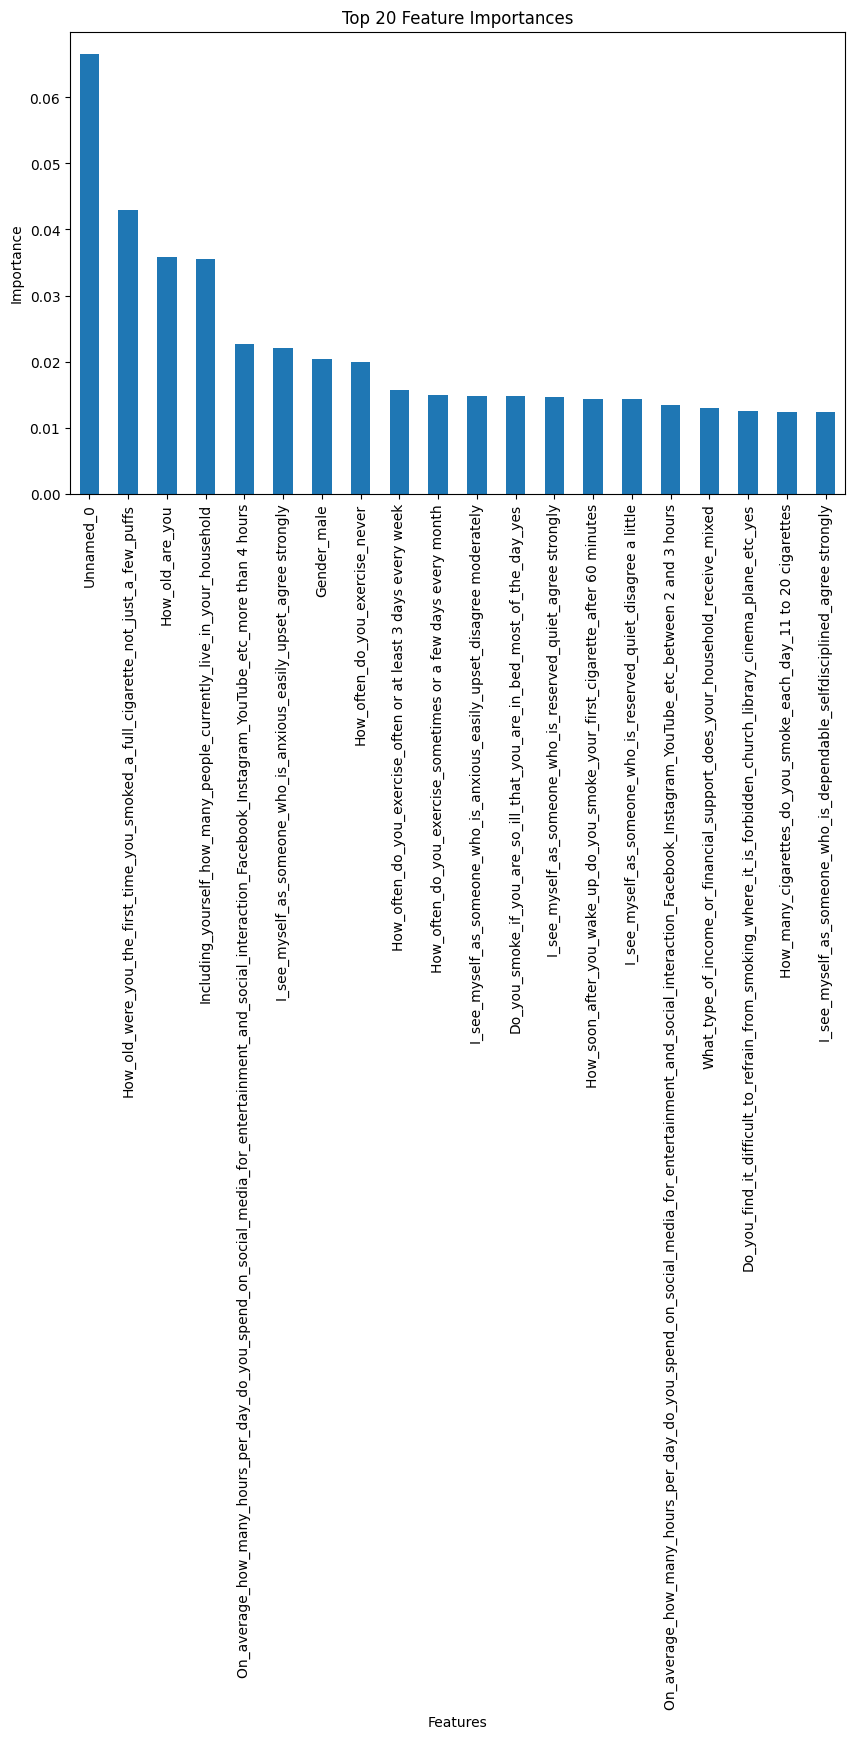

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importance from the trained Random Forest model
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot top 20 most important features
plt.figure(figsize=(10, 6))
feature_importances.head(20).plot(kind='bar')
plt.title("Top 20 Feature Importances")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

In [8]:
if "Unnamed_0" in X.columns:
    X_reduced = X.drop(columns=["Unnamed_0"])


In [9]:
cumulative_importance = feature_importances.cumsum()
selected_features = cumulative_importance[cumulative_importance <= 0.95].index
X_reduced = X[selected_features]
print(f"Reduced feature set size: {X_reduced.shape[1]} features")


Reduced feature set size: 120 features


In [15]:
from sklearn.model_selection import cross_val_score
import numpy as np

rf_model_tuned = RandomForestClassifier(
    n_estimators=200,          # Number of trees
    max_depth=10,              # Limit the depth of each tree
    min_samples_split=10,      # Minimum samples required to split an internal node
    min_samples_leaf=5,        # Minimum samples required to be at a leaf node
    random_state=42,           # For reproducibility
)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf_model_tuned, X_reduced, y, cv=5, scoring='accuracy')

# Print the cross-validation results
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean CV Accuracy: {np.mean(cv_scores):.2f}")
print(f"Standard Deviation of CV Accuracy: {np.std(cv_scores):.2f}")

Cross-Validation Accuracy Scores: [0.41860465 0.5        0.5        0.23809524 0.4047619 ]
Mean CV Accuracy: 0.41
Standard Deviation of CV Accuracy: 0.10


Model is not performing good despite reducing number of features. thus, I will try another metod